## 数据清理和整理
任务：
- 转换成`df`，每个元素是时间和内容的二元项
- 删除标点获得`df_d`
- 台词的一元列表`all_serifu_list`，统计每个台词的数量`serifu_counter`

In [1]:
# import os
# import re

# def is_valid_timestamp(timestamp):
#     # 检查时间戳格式是否为 "HH:MM:SS,mmm --> HH:MM:SS,mmm"
#     pattern = r'^\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}$'
#     return bool(re.match(pattern, timestamp.strip()))

# def check_srt_file(filepath):
#     with open(filepath, 'r', encoding='utf-8') as f:
#         lines = [line.rstrip('\r\n') for line in f.readlines()]  # 只移除行尾换行符，保留其他内容
    
#     line_num = 0
#     empty_line_count = 0  # 记录连续空行的数量
    
#     while line_num < len(lines):
#         current_line = lines[line_num]
#         stripped_line = current_line.strip()  # 用于格式检查
        
#         # 检查是否是真正的空行（只包含换行符）
#         if current_line == '':
#             empty_line_count += 1
#             if empty_line_count > 1:
#                 print(f"文件: {filepath}")
#                 print(f"行 {line_num + 1}: 发现连续多个空行（第 {empty_line_count} 个空行）")
#                 print("---")
#             line_num += 1
#             continue
#         # 检查是否是伪空行（只包含空格或不可见字符）
#         elif not stripped_line:
#             print(f"文件: {filepath}")
#             print(f"行 {line_num + 1}: 无效的空行 - 包含不可见字符 - '{repr(current_line)}'")
#             print("---")
#             empty_line_count = 0  # 重置空行计数，因为这不是真正的空行
#             line_num += 1
#             continue
#         else:
#             empty_line_count = 0  # 重置空行计数
        
#         # 检查序号（应该是整数）
#         try:
#             int(stripped_line)
#         except ValueError:
#             print(f"文件: {filepath}")
#             print(f"行 {line_num + 1}: 无效的序号 - '{stripped_line}'")
#             print("---")
#             line_num += 1
#             continue
            
#         # 检查下一行是否是时间戳
#         if line_num + 1 >= len(lines):
#             print(f"文件: {filepath}")
#             print(f"行 {line_num + 1}: 缺少时间戳")
#             print("---")
#             break
            
#         timestamp_line = lines[line_num + 1].strip()
#         if not is_valid_timestamp(timestamp_line):
#             print(f"文件: {filepath}")
#             print(f"行 {line_num + 2}: 无效的时间戳 - '{timestamp_line}'")
#             print("---")
        
#         # 移动到下一个字幕块
#         line_num += 2
#         while line_num < len(lines) and lines[line_num].strip():
#             line_num += 1
#         line_num += 1  # 跳过空行

# def scan_srt_files(path):
#     # 遍历文件夹中的所有文件
#     for root, dirs, files in os.walk(path):
#         for file in files:
#             if file.lower().endswith('.srt'):
#                 filepath = os.path.join(root, file)
#                 print(f"正在检查: {filepath}")
#                 check_srt_file(filepath)

# # 示例使用
# folder_path = "E:\\Github\\animecomment\\進撃の巨人\\subtitle"  # 替换为实际路径，例如 "C:/subtitles"
# scan_srt_files(folder_path)

In [2]:
import os
import pandas as pd

def parse_srt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    entries = []
    i = 0
    while i < len(lines):
        if lines[i].strip().isdigit():
            time_range = lines[i + 1].strip()
            # subtitle可能不止一行，所以要循环读取
            subtitle = ''
            for j in range(i + 2, len(lines)):
                if lines[j].strip() == '':
                    break
                subtitle += lines[j].strip()
            entries.append((time_range, subtitle))
        i += 1
    return entries

def get_srt_valid(directory):
    # 列出当前目录中的所有文件
    files = os.listdir(directory)
    # 筛选出以 "進撃の巨人" 开头并以 ".srt" 结尾的文件
    srt_files = [file for file in files if file.startswith("進撃の巨人") and file.endswith(".srt")]
    # 排除掉 進撃の巨人-シーズン7 开头的文件
    srt_files = [file for file in srt_files if not file.startswith("進撃の巨人-シーズン7")]
    # 加入完結編的文件
    srt_files += [file for file in files if file.startswith("進撃の巨人-シーズン8") and file.endswith(".srt")]
    # 加入ovd
    srt_files += [file for file in files if file.startswith("進撃の巨人-シーズンOAD") and file.endswith(".srt")]
    return srt_files


def get_srt_files(directory):
    # 列出当前目录中的所有文件
    files = os.listdir(directory)

    # 筛选出以 "進撃の巨人" 开头并以 ".srt" 结尾的文件
    srt_files = [file for file in files if file.startswith("進撃の巨人") and file.endswith(".srt")]

    # 排除掉 進撃の巨人-シーズン7 开头的文件
    srt_files = [file for file in srt_files if not file.startswith("進撃の巨人-シーズン7")]

    # 加入完結編的文件
    srt_files += [file for file in files if file.startswith("進撃の巨人-シーズン8") and file.endswith(".srt")]

    # 加入ovd
    srt_files += [file for file in files if file.startswith("進撃の巨人-シーズンOAD") and file.endswith(".srt")]

    # 创建一个字典来存储每个文件的二元列表
    srt_data = {}

    for srt_file in srt_files:
        file_path = os.path.join(directory, srt_file)
        srt_data[srt_file] = parse_srt_file(file_path)
    return srt_data

srt_data = get_srt_files('E:\\Github\\animecomment\\進撃の巨人\\subtitle')

# 将字典转换为 DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in srt_data.items()]))

# 显示 DataFrame
print(df)

                進撃の巨人-シーズン1-01-二千年後の君へ～シガンシナ陥落1～_ja.srt  \
0     (00:00:26,426 --> 00:00:30,263, （アルミン）その日 人類は思...   
1     (00:00:36,169 --> 00:00:39,105, （アルミン）奴(やつ)らに支...   
2     (00:00:41,541 --> 00:00:44,110, （アルミン）鳥籠の中にとらわ...   
3                  (00:00:44,811 --> 00:00:46,112, 屈辱を)   
4        (00:01:04,730 --> 00:01:06,299, （キース）総員 戦闘用意！)   
...                                                 ...   
999                                                 NaN   
1000                                                NaN   
1001                                                NaN   
1002                                                NaN   
1003                                                NaN   

                    進撃の巨人-シーズン1-02-その日～シガンシナ陥落2～_ja.srt  \
0     (00:00:06,172 --> 00:00:08,375, （アルミン）今から100年以...   
1          (00:00:09,075 --> 00:00:11,678, 人類にある天敵が現れた)   
2     (00:00:16,750 --> 00:00:21,688, 彼らと人類の間には圧倒的な力...   
3     (00:00:22,355 --> 00:00:25,725, たちまち人類は絶滅の危機を迎えた)

In [3]:
# 打印第87集的字幕 检查空格是否正确
# pd.set_option('display.max_colwidth', None)  # 不限制列宽，显示完整文本
# pd.set_option('display.max_rows', None)      # 不限制行数，显示所有行
# pd.set_option('display.width', None)         # 自动调整宽度
print(df['進撃の巨人-シーズン8-The Final Season2-完結編 後編_ja.srt'])

0                    (00:00:03,343 --> 00:00:06,046, あれ…)
1                  (00:00:06,046 --> 00:00:08,245, 何だろう?)
2                   (00:00:10,649 --> 00:00:12,649, （雷鳴）)
3         (00:00:19,391 --> 00:00:21,760, 見えた! 飛び降りる準備を!)
4       (00:00:21,760 --> 00:00:24,163, オニャンコポン! お前も早く...
                              ...                        
999               (01:21:03,731 --> 01:21:06,831, ふっ… っ…)
1000               (01:21:10,005 --> 01:21:13,604, （鳴き声）)
1001       (01:21:16,211 --> 01:21:19,810, また… あなたに会いたい…)
1002              (01:21:23,318 --> 01:21:25,318, （羽音）っ!)
1003    (01:21:43,438 --> 01:21:48,643, エレン…マフラーを巻いてくれ...
Name: 進撃の巨人-シーズン8-The Final Season2-完結編 後編_ja.srt, Length: 1004, dtype: object


In [4]:
# 删除空内容，注意dropna()函数会出大问题。
df_d = df
print(df_d)

                進撃の巨人-シーズン1-01-二千年後の君へ～シガンシナ陥落1～_ja.srt  \
0     (00:00:26,426 --> 00:00:30,263, （アルミン）その日 人類は思...   
1     (00:00:36,169 --> 00:00:39,105, （アルミン）奴(やつ)らに支...   
2     (00:00:41,541 --> 00:00:44,110, （アルミン）鳥籠の中にとらわ...   
3                  (00:00:44,811 --> 00:00:46,112, 屈辱を)   
4        (00:01:04,730 --> 00:01:06,299, （キース）総員 戦闘用意！)   
...                                                 ...   
999                                                 NaN   
1000                                                NaN   
1001                                                NaN   
1002                                                NaN   
1003                                                NaN   

                    進撃の巨人-シーズン1-02-その日～シガンシナ陥落2～_ja.srt  \
0     (00:00:06,172 --> 00:00:08,375, （アルミン）今から100年以...   
1          (00:00:09,075 --> 00:00:11,678, 人類にある天敵が現れた)   
2     (00:00:16,750 --> 00:00:21,688, 彼らと人類の間には圧倒的な力...   
3     (00:00:22,355 --> 00:00:25,725, たちまち人類は絶滅の危機を迎えた)

In [5]:
import re
print(df_d['進撃の巨人-シーズン8-The Final Season2-完結編 後編_ja.srt'])
# 定义清理函数
def clean_element(x):
    try:
        if isinstance(x, tuple) and len(x) == 2:
            # 先移除中文括号及其内容，再移除 \u200e
            cleaned = re.sub(r'\（.*?\）', '', str(x[1]))  # 移除括号
            cleaned = re.sub(r'\u200e', '', cleaned)       # 移除 \u200e
            return (x[0], cleaned)
        # 非元组或长度不为 2 的情况，仍然移除 \u200e
        return re.sub(r'\u200e', '', str(x))
    except Exception as e:
        print(f"Error processing {x}: {e}")
        return x  # 出错时保持原值，避免数据丢失

# 对整个 DataFrame 应用清理
df_d = df_d.map(clean_element)

print(df_d['進撃の巨人-シーズン8-The Final Season2-完結編 後編_ja.srt'])

0                    (00:00:03,343 --> 00:00:06,046, あれ…)
1                  (00:00:06,046 --> 00:00:08,245, 何だろう?)
2                   (00:00:10,649 --> 00:00:12,649, （雷鳴）)
3         (00:00:19,391 --> 00:00:21,760, 見えた! 飛び降りる準備を!)
4       (00:00:21,760 --> 00:00:24,163, オニャンコポン! お前も早く...
                              ...                        
999               (01:21:03,731 --> 01:21:06,831, ふっ… っ…)
1000               (01:21:10,005 --> 01:21:13,604, （鳴き声）)
1001       (01:21:16,211 --> 01:21:19,810, また… あなたに会いたい…)
1002              (01:21:23,318 --> 01:21:25,318, （羽音）っ!)
1003    (01:21:43,438 --> 01:21:48,643, エレン…マフラーを巻いてくれ...
Name: 進撃の巨人-シーズン8-The Final Season2-完結編 後編_ja.srt, Length: 1004, dtype: object
0                    (00:00:03,343 --> 00:00:06,046, あれ…)
1                  (00:00:06,046 --> 00:00:08,245, 何だろう?)
2                       (00:00:10,649 --> 00:00:12,649, )
3         (00:00:19,391 --> 00:00:21,760, 見えた! 飛び降りる準備を!)
4       (00:00:21,760 --> 00:00:24,163, オニャンコポン! お前

In [6]:
# 删除所有非日文汉字或假名的字符
# df_d = df_d.map(lambda x: (x[0], re.sub(r'[^\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF]', '', x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
import re

df_d = df_d.apply(lambda col: col.map(lambda x: (x[0], re.sub(r'[^\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF\u0030-\u0039\uFF10-\uFF19\u3000-\u303F\uFF01-\uFF60]', '', x[1])) if isinstance(x, tuple) and len(x) == 2 else x))

print(df_d['進撃の巨人-シーズン6-87-人類の夜明け_ja.srt'])

0         (00:00:08,007 --> 00:00:10,260, 誰もがエレンは変わったと言う)
1                (00:00:11,803 --> 00:00:13,304, 私もそう思った)
2         (00:00:14,764 --> 00:00:18,852, でもそれは違うのかもしれない)
3       (00:00:32,824 --> 00:00:35,618, エレンは最初から何も変わって...
4        (00:00:36,578 --> 00:00:39,039, あれがエレン本来の姿だとしたら)
                              ...                        
999                                                   nan
1000                                                  nan
1001                                                  nan
1002                                                  nan
1003                                                  nan
Name: 進撃の巨人-シーズン6-87-人類の夜明け_ja.srt, Length: 1004, dtype: object


In [7]:
# 确保所有的二元项都是字符串
df_d = df_d.map(lambda x: (x[0], str(x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
print(df_d['進撃の巨人-シーズン6-87-人類の夜明け_ja.srt'])

0         (00:00:08,007 --> 00:00:10,260, 誰もがエレンは変わったと言う)
1                (00:00:11,803 --> 00:00:13,304, 私もそう思った)
2         (00:00:14,764 --> 00:00:18,852, でもそれは違うのかもしれない)
3       (00:00:32,824 --> 00:00:35,618, エレンは最初から何も変わって...
4        (00:00:36,578 --> 00:00:39,039, あれがエレン本来の姿だとしたら)
                              ...                        
999                                                   nan
1000                                                  nan
1001                                                  nan
1002                                                  nan
1003                                                  nan
Name: 進撃の巨人-シーズン6-87-人類の夜明け_ja.srt, Length: 1004, dtype: object


In [8]:
# 所有台词列表
all_serifu_list = []
for col in df_d.columns:
    all_serifu_list.extend(df_d[col].apply(lambda x: x[1] if isinstance(x, tuple) and len(x) == 2 else '').tolist())

print(all_serifu_list[110:150])


['ああっ！', 'それだけしか取り返せませんでした', '', 'でも息子は', '役に立ったんですよね？', '何か直接の手柄てがらはなくても', '息子の死は人類の反撃の糧になったんですよね？', 'もちろん！', 'いや', '今回の調査で我々はいや', '今回も', '何の成果も得られませんでした！', '私が無能なばかりにただいたずらに兵を死なせ', '奴らの正体を', '突き止めることができませんでした！', 'ひでえもんだな', '全くだ', 'これじゃあ俺らの税で奴らにエサをやって太らせてるようなもんだ', 'えいっうわっ！あ', '何すんだクソガキ！', 'うう！うわっ', 'おいっ何だよミカサ！', 'おい！戻ってこいコラー！', 'ミカサもういいだろ！', 'うわーっ！', '何すんだよ！薪まきが散っちゃったじゃねえか！', 'エレン調査兵団に入りたいって気持ちは変わった？', '手伝えよ拾うの', '手伝うほど無いじゃない', 'ただいま', 'おかえりなさい', 'あらエレン今日は珍しく頑張ったじゃない', 'ああ', 'いっ！何だよ！', '耳が赤かったウソついた証拠', 'ミカサに手伝ってもらったのね', 'あれ？父さん出かけるの？', '仕事？', 'ああ内地へ診療だ２～３日かかるかな', 'ふーん']


In [9]:
# 把 all_serifu_list 这个列表进行重复元素的数量统计
from collections import Counter
serifu_counter = Counter(all_serifu_list)
print(serifu_counter.most_common(100))
# 删除指定的台词
serifu_to_delete = [
    '','あっ', 'ああ', 'あ', 'うっ', 'はっ', 'ん', 'はい', 'おい', 'うん', 
    'くっ', 'ハッ', 'えっ', 'ううっ', 'ああっ', 'うわっ', 'うわ', 'うう', 
    'ハアハア', 'うお', 'クソッ', 'うっうう', 'ぐっ', 'んっ', 'あああ', 
    'んんっ', 'うおおお', 'うあっ', 'ウオオオ', 'ちっ', 'ウアアアアー', 
    'ハア', 'ハァ', 'ふっ', 'うあ', 'おお',
    'え','は','なっ'
]
for serifu in serifu_to_delete:
    del serifu_counter[serifu]
print(serifu_counter.most_common(100))

[('', 64378), ('あっ', 318), ('〜', 211), ('あ', 170), ('～', 164), ('ああ', 160), ('え？', 155), ('エレン', 105), ('うっ', 82), ('ん？', 82), ('はっ', 75), ('はい', 69), ('くっ', 60), ('うん', 59), ('エレン！', 51), ('ハッ！', 48), ('そうか', 46), ('はっ！', 44), ('ああっ！', 38), ('は？', 38), ('うっ！', 36), ('あっ！', 36), ('アルミン', 36), ('そうだ', 36), ('えっ？', 34), ('おい', 32), ('ううっ！', 32), ('なっ', 30), ('ハアハア', 30), ('っ', 29), ('ううっ', 28), ('ハッ', 28), ('そんな', 27), ('うわっ', 25), ('うお〜！', 25), ('いや', 24), ('でも', 24), ('はあ？', 23), ('えっ', 22), ('まさか', 22), ('ミカサ', 21), ('しかし', 21), ('うう', 21), ('了解！', 21), ('ああっ', 19), ('うっうう', 19), ('そう', 19), ('あ？', 18), ('うわっ！', 18), ('え', 18), ('だから', 18), ('ライナー', 18), ('エレン？', 17), ('おい！', 17), ('兵長', 17), ('うわ〜！', 17), ('あああ', 16), ('俺は', 16), ('ミカサ！', 15), ('はい！', 15), ('ハンジさん', 15), ('いいや', 15), ('ユミル', 15), ('ライナー！', 15), ('ありがとう', 14), ('ごめん', 14), ('フッ', 14), ('心臓を捧げよ！', 14), ('ハア', 14), ('んんっ！', 13), ('これは', 13), ('そして', 13), ('クソ！', 13), ('それは', 13), ('ジャン！', 13), ('エルヴィン', 13), ('ぐっ', 13),

## 寻找关键词呼应

In [10]:
import pandas as pd

keywords = [
    ["自由"],
    ["駆逐"],
    ["殺す","殺し"],
    ["進撃"],
    ["奴隷"],
    ["記憶", "きおく", "キオク"],
    ["未来", "ミライ"],
    ["うんざり", "うんざり", "ウンザリ"],
    ["壁", "かべ", "カベ"],
    ["外に", "外へ","外の","外で","外だ","外か","外が","外は","外を","外に","外まで","外側","外出","外も","と外"],
    ["海", "うみ", "ウミ"],
    ["敵"],
    ["同じ"],
    ["悪魔", "あくま", "アクマ"],
    ["進む", "進め"], 
    ["戦士"], 
    ["兵士"], 
    ["死"],
    ["生きる","生きろ","生きよう","生きたい","生きた","生きます","生きて","生きな"], 
    ["子ども", "こども", "子供"],
    ["森"],
    # ["空だ","空か","空が","空は","空を","空に","空へ","空まで"],
    ["鳥"],
    ["鍵", "カギ"],
    ["家族"],
    ["愛"],
    ["優し"],
    ["未練"],
    ["守る", "守れ", "守り", "守って"],
    ["また"]
]

# 1. 创建字典，以每个小列表的第一个关键词为键，其他关键词为值
data = {k[0]: k for k in keywords}

# 2. 找出最长的关键词列表长度，保证 DataFrame 的列对齐
max_len = max(len(v) for v in data.values())

# 3. 使用 `None` 填充较短的列，使所有列等长
for key in data:
    data[key] += [None] * (max_len - len(data[key]))

# 4. 转换成 DataFrame
keywords_df = pd.DataFrame(data)

print("keywords_df:")
print(keywords_df)

# 5. 创建 find_df，初始值全部为空列表，长度与 keywords_df 保持一致
find_df = pd.DataFrame([[[] for _ in range(len(keywords_df.columns))]], columns=keywords_df.columns)

print(find_df)



keywords_df:
      自由    駆逐    殺す    進撃    奴隷    記憶    未来  うんざり     壁   外に  ...   子ども  \
0     自由    駆逐    殺す    進撃    奴隷    記憶    未来  うんざり     壁   外に  ...   子ども   
1   None  None    殺し  None  None   きおく   ミライ  うんざり    かべ   外へ  ...   こども   
2   None  None  None  None  None   キオク  None  ウンザリ    カベ   外の  ...    子供   
3   None  None  None  None  None  None  None  None  None   外で  ...  None   
4   None  None  None  None  None  None  None  None  None   外だ  ...  None   
5   None  None  None  None  None  None  None  None  None   外か  ...  None   
6   None  None  None  None  None  None  None  None  None   外が  ...  None   
7   None  None  None  None  None  None  None  None  None   外は  ...  None   
8   None  None  None  None  None  None  None  None  None   外を  ...  None   
9   None  None  None  None  None  None  None  None  None   外に  ...  None   
10  None  None  None  None  None  None  None  None  None  外まで  ...  None   
11  None  None  None  None  None  None  None  None  None   外側  ...  None   

In [11]:
# 遍历 df_d 中的每个二元项，检测其第二个参数是否含有 keywords_df 中的关键词，如果有，则在 find_df 中的对应列中添加该二元项。
col_index = 1
# 遍历每一集
for col in df_d.columns:
    # 添加新的一行，每个数据是一个空列表
    find_df.loc[col_index] = [[] for _ in range(len(keywords_df.columns))]
    # 遍历一集的台词
    for idx, item in enumerate(df_d[col]):
        if item == 'nan':
            continue
        try:
            param1, param2 = item
            # 确保 param2 是字符串
            param1 = str(param1)
            param2 = str(param2)
            # 遍历 keywords_df 的每一列
            for keyword_col in keywords_df.columns:
                if any(str(keyword) in param2 for keyword in keywords_df[keyword_col]):
                    templist = find_df[keyword_col][col_index]
                    templist.append([param1, param2])
                    find_df.loc[col_index, keyword_col] = templist
        except:
            print('something wrong')
    col_index = 1 + col_index


# 打印某一列不是空列表的行
strrr = '自由'
print(find_df[strrr][find_df[strrr].apply(lambda x: len(x) > 0)])

12    [[00:10:59,759 --> 00:11:02,061, 当初の作戦どおり自由に動く...
13    [[00:10:52,418 --> 00:10:53,786, 自由だ], [00:11:...
16    [[00:21:34,793 --> 00:21:37,896, 背中の印自由の翼って言うん...
25              [[00:13:25,938 --> 00:13:27,439, 自由ダ！]]
26    [[00:06:03,796 --> 00:06:07,700, 巨人に奪われた自由を取り戻...
35    [[00:14:55,519 --> 00:15:01,609, 再び目を覚ますとそこには自...
42       [[00:14:19,817 --> 00:14:23,279, つまり我々は自由の身だ]]
44            [[00:14:09,306 --> 00:14:10,808, お前は自由だ]]
45    [[00:17:48,484 --> 00:17:51,945, 壁の中で自由に散歩させてあ...
48    [[00:14:27,283 --> 00:14:30,953, その存在は魂が自由であるこ...
50    [[00:06:57,959 --> 00:07:02,588, そこで初めて知ったんだ俺は...
54     [[00:09:38,953 --> 00:09:41,414, 俺は自由を取り返すためなら]]
57    [[00:14:33,247 --> 00:14:34,707, お前は自由だ], [00:...
58    [[00:09:51,424 --> 00:09:54,176, これが自由の代償だと分かっ...
59    [[00:00:16,140 --> 00:00:19,185, 自由を求めて進み続けた],...
62    [[00:21:21,697 --> 00:21:25,951, 心も体もむしばまれ徹底的に...
63    [[00:05:18,192 --> 00:05:22,780, 我々はマーレへの贖罪しょく...
67     [[00:20:20,844 --> 00:20:22,971, エルディアに自由

In [12]:
# 测试插入的台词是否正确
serifutest = "目を覚ますとそこには自由"
# 从df_d中找到这句台词
for col in df_d.columns:
    for idx, item in enumerate(df_d[col]):
        if item == 'nan':
            continue
        try:
            param1, param2 = item
            if serifutest in str(param2):
                print(col)
                print(param1, param2)
                break
        except:
            print('something wrong')

進撃の巨人-シーズン2-35-子供達_ja.srt
00:14:55,519 --> 00:15:01,609 再び目を覚ますとそこには自由が広がっていた


In [13]:
# # 把 find_df 为 CSV 文件
# find_df.to_csv('find_df.csv', index=False, encoding='utf-8-sig')
# 把 find_df 转为markdown文件，每个副标题是一个关键词，下面是这个关键词的台词
with open('find_df.md', 'w', encoding='utf-8') as file:
    for keyword in keywords_df.columns:
        file.write(f'## {keyword}\n')
        for idx, item in enumerate(find_df[keyword]):
            if len(item) == 0:
                continue
            file.write(f'- {idx}: ')
            # 序号对应的标题 即df_d的列名 截取名词第二个-开始到_之前的内容
            text = df_d.columns[idx-1]
            start = text.rfind("-", 0, text.rfind("_"))  # 找到最后一个 "-"，但不包括 "_" 之后的部分
            end = text.rfind("_")  # 找到 "_" 的位置
            file.write(f'{text[start+1:end]}\n')
            for param1, param2 in item:
                # 把param1简化只保留开始时间
                param1 = param1.split(' --> ')[0]+':'
                file.write(f'   - {param1} {param2}\n')
            file.write('\n')


## 视频剪辑

In [14]:
def get_video_path(index):
    """根据索引返回对应的视频文件路径"""
    base_path = "E:\\影视\\save\\进击的巨人"
    mapping = [
        (1, 25, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S1]"),
        (26, 37, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S2]"),
        (38, 49, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part1]"),
        (50, 59, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part2]"),
        (60, 75, f"{base_path}\\[BeanSub&LoliHouse] Shingeki no Kyojin [60-75][WebRip 1080p HEVC-10bit AAC ASSx2]"),
        (76, 87, f"{base_path}\\[BeanSub&LoliHouse] Shingeki no Kyojin [76-87][WebRip 1080p HEVC-10bit AAC ASSx2]"),
        (88, 89, f"{base_path}"),
        (90, 100, f"{base_path}\\[Baws] Shingeki no Kyojin OVA (WEB 1080p HEVC FLAC)"),
    ]
    
    for start, end, folder in mapping:
        if start <= index <= end:
            return folder
    return None

def get_video_file(index):
    """根据索引返回对应的视频文件"""
    video_folder = get_video_path(index)
    if not video_folder:
        print(f"找不到第 {index} 集的视频文件夹")
        return None
    video_files = [f for f in os.listdir(video_folder) if f.endswith('.mkv') or f.endswith('.mp4')]
    
    if 1 <= index <= 59:
        pattern = re.compile(rf'\[LY-RAW\]\[BDRIP\]\[Shingeki.no.Kyojin\]\[{index:02}\]\[x265_tta\].*\.mkv')
        video_files = [f for f in video_files if pattern.match(f)]
    elif 60 <= index <= 87:
        pattern = re.compile(rf'\[BeanSub&LoliHouse\] Shingeki no Kyojin - {index:02} \[WebRip 1080p HEVC-10bit AAC ASSx2\]\.mkv')
        video_files = [f for f in video_files if pattern.match(f)]
    # 完结篇
    elif index == 88:
        video_files = ["CheeseAni_Shingeki_no_Kyojin_The_Final_Season_Kanketsu_hen_Part.mkv"]
    elif index == 89:
        video_files = ["[CheeseAni] Shingeki no Kyojin The Final Season - Kanketsu-hen [Part 2][BDRip][1080p][HEVC+OPUS].mkv"]
    elif 90 <= index <= 100:
        # [Baws] Attack on Titan S0E01 v3 - Ilse's Notebook (WEB 1080p HEVC FLAC) [D4DE11A3].mkv
        pattern = re.compile(rf'\[Baws\] Attack on Titan S0E{index - 89:02} .*\.mkv')
        video_files = [f for f in video_files if pattern.match(f)]

    return video_files[0] if video_files else None


print(get_video_path(25))
print(get_video_path(26))
print(get_video_path(40))
print(get_video_path(50))
print(get_video_path(87))
print(get_video_path(88))
print(get_video_path(89))
print(get_video_path(95))
print("----")
print(get_video_file(2))
print(get_video_file(25))
print(get_video_file(29))
print(get_video_file(60))
print(get_video_file(87))
print(get_video_file(88))
print(get_video_file(89))
print(get_video_file(95))

E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S1]
E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S2]
E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part1]
E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part2]
E:\影视\save\进击的巨人\[BeanSub&LoliHouse] Shingeki no Kyojin [76-87][WebRip 1080p HEVC-10bit AAC ASSx2]
E:\影视\save\进击的巨人
E:\影视\save\进击的巨人
E:\影视\save\进击的巨人\[Baws] Shingeki no Kyojin OVA (WEB 1080p HEVC FLAC)
----
[LY-RAW][BDRIP][Shingeki_no_Kyojin][02][x265_tta][19F98A15](1).mkv
[LY-RAW][BDRIP][Shingeki_no_Kyojin][25][x265_tta][2AFCD3BB].mkv
[LY-RAW][BDRIP][Shingeki no Kyojin][29][x265_tta][8A42DF66].mkv
[BeanSub&LoliHouse] Shingeki no Kyojin - 60 [WebRip 1080p HEVC-10bit AAC ASSx2].mkv
[BeanSub&LoliHouse] Shingeki no Kyojin - 87 [WebRip 1080p HEVC-10bit AAC ASSx2].mkv
CheeseAni_Shingeki_no_Kyojin_The_Final_Season_Kanketsu_hen_Part.mkv
[CheeseAni] Shingeki no Kyojin The Final Season - Kanketsu-hen [Part 2][BDRip][1080p][HEVC+OPUS].mkv
[Baws] Attack on Titan S0

In [15]:
def parse_time(time_str):
    """将时间字符串转换为秒数。"""
    hours, minutes, seconds = time_str.split(':')
    seconds1, milliseconds = seconds.split(',')
    total_seconds = int(hours) * 3600 + int(minutes) * 60 + int(seconds1) + int(milliseconds) / 1000
    return total_seconds

def format_time(SECONDS):
    """将秒数格式化为时间字符串。"""
    hours = int(SECONDS / 3600)
    minutes = int((SECONDS - hours*3600) / 60)
    seconds = int((SECONDS - hours*3600 - minutes*60))
    milliseconds = int((SECONDS - hours*3600 - minutes*60 - seconds) * 1000)
    return f"{hours:02}:{minutes:02}:{seconds:02},{milliseconds:03}"

def adjust_timestamps(timestamp_str):

    # 解析输入字符串
    start_str, end_str = timestamp_str.split(' --> ')
    
    # 转换为秒数
    start_time = parse_time(start_str)
    end_time = parse_time(end_str)

    # 视频的起始时间和结束时间（以秒为单位）
    video_start_time = 0
    video_end_time = 7200  # 2小时

    # 调整时间
    adjusted_start_time = max(start_time - 4, video_start_time)
    adjusted_end_time = min(end_time + 4, video_end_time)

    # 格式化为时间字符串
    adjusted_start_str = format_time(adjusted_start_time)
    adjusted_end_str = format_time(adjusted_end_time)

    # 持续时间
    duration = end_time - start_time + 8
    duration_str = format_time(duration)

    # 返回调整后的时间戳
    return [f"{adjusted_start_str} --> {adjusted_end_str}", duration_str]

# 示例用法
input_str = "01:02:01,509 --> 01:59:59,309"
print(adjust_timestamps(input_str)[0])
print(adjust_timestamps(input_str)[1])

01:01:57,509 --> 02:00:00,000
00:58:05,800


In [ ]:
import os
import subprocess

def process_videos(find_df, target, savepath):
    """遍历DataFrame并裁剪视频"""
    target_folder = os.path.join(savepath, target)
    os.makedirs(target_folder, exist_ok=True)
    
    for index, row in find_df.iterrows():
        # print(f"Processing episode {index}...")
        if index > len(find_df):
            break
        if index == 0:
            continue
        video_folder = get_video_path(index)
        video_file = get_video_file(index)
        if not video_folder or not video_file:
            continue
        video_path = os.path.join(video_folder, video_file)
        # print(f"Video path: {video_path}")
        for item in row[target]:
            # tt = re.sub(r'[^\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF]', '', item[1]) 万一日后改名
            tem_digit = ''.join([x for x in item[0] if x.isdigit()])
            clip_name = f"{target}_{index:02}_{tem_digit}_{item[1]}.mp4"
            new_path = os.path.join(target_folder, clip_name)
            if os.path.exists(new_path):
                # print(f"Clip {target}_{index:02}_{tem_digit}_{item[1]}.mp4 already exists")
                continue
            # 检测是否存在一个文件开头和目标一样，这是之前字幕有多行时已经下载的文件的处理
            flag = False
            for file in os.listdir(target_folder):
                if file.startswith(f"{target}_{index:02}_{tem_digit}"):
                    print(f"Clip {target}_{index:02}_{tem_digit} already exists")
                    # 把该存在的文件名替换
                    os.rename(os.path.join(target_folder, file), new_path)
                    print(f"Clip {target}_{index:02}_{tem_digit} 替换名称成功")
                    flag = True
                    break
            if flag:
                continue
            # continue
            print(f"Output path: {new_path}")
            # 计算实践戳
            adjust_time_str = adjust_timestamps(item[0])[0]
            start_time_str = adjust_time_str.split(' --> ')[0]
            end_time_str = adjust_time_str.split(' --> ')[1]
            duration_str = adjust_timestamps(item[0])[1]
            # print(f"Start time: {start_time_str}")
            # print(f"End time: {end_time_str}")
            # print(f"Duration: {duration_str}")
            # 使用ffmpeg进行视频裁剪，增加时间限制
            # 注意ffmpeg的格式和srt的时间戳格式不一样！！！！特别是逗号和点的区别
            start_time_str = start_time_str.replace(',', '.')
            duration_str = duration_str.replace(',', '.')
            try:
                ffmpeg_command = [# 每个大约32M
                    'ffmpeg', 
                    '-i', video_path, 
                    '-ss', start_time_str, 
                    '-t', duration_str,
                    '-c:v', 'libx264', 
                    '-crf', '12', 
                    '-preset', 'slow',
                    '-c:a', 'aac', 
                    '-b:a', '192k', 
                    '-movflags', '+faststart', 
                    new_path
                ]
                subprocess.run(ffmpeg_command, check=True)
            except Exception as e:
                print(f"Error processing episode {index}: {e}")

# 示例调用
savepath = 'D:\\進撃の巨人clips'
process_videos(find_df, "未来", savepath)
# for target in keywords_df.columns:
#     process_videos(find_df, target, savepath)

Clip 未来_01_001713298001718337 already exists
Clip 未来_01_001713298001718337 替换名称成功
Output path: D:\進撃の巨人clips\未来\未来_34_002055963002059800_自分のわずかな命かクリスタの未来か.mp4
Output path: D:\進撃の巨人clips\未来\未来_35_001748317001751111_クリスタの未来を奪うことになっても.mp4
Output path: D:\進撃の巨人clips\未来\未来_36_002401690002404901_彼らが求める未来とはどこにあるのだろうか？.mp4
Output path: D:\進撃の巨人clips\未来\未来_49_001930669001933380_人類の未来を任せたぞ！.mp4
Output path: D:\進撃の巨人clips\未来\未来_51_002342212002346716_今日もあの日も話し合えば未来は変えられたのか.mp4
Output path: D:\進撃の巨人clips\未来\未来_61_001949521001954359_通常兵器が巨人兵器を上回る未来がより明確に知れ渡った.mp4
Output path: D:\進撃の巨人clips\未来\未来_61_002130038002135043_祖国マーレの未来のために今一度皆の心をひとつにしよう.mp4
Output path: D:\進撃の巨人clips\未来\未来_64_002050332002053293_どうか一緒に未来を生きてほしい.mp4
Output path: D:\進撃の巨人clips\未来\未来_66_001830275001835405_みんなとエレンを回収できなければ僕らに未来はありません.mp4
Output path: D:\進撃の巨人clips\未来\未来_71_002346967002350846_信じた先に報われる未来があるのか？.mp4
Output path: D:\進撃の巨人clips\未来\未来_73_001909898001913068_エルディアの未来のために心臓を捧げます！.mp4
Output path: D:\進撃の巨人clips\未来\未来_74_002

In [17]:
# # 输入字幕文件srt，把所有时间戳都提前5.8秒
# def adjust_srt_timestamps(srt_path):
#     """将srt文件中的所有时间戳提前5.8秒。"""
#     # 读取srt文件
#     with open(srt_path, 'r', encoding='utf-8') as file:
#         lines = file.readlines()

#     # 调整时间戳
#     adjusted_lines = []
#     for line in lines:
#         if ' --> ' in line:
#             start_str, end_str = line.split(' --> ')
#             start_time = parse_time(start_str) +3
#             end_time = parse_time(end_str) +3
#             adjusted_start_str = format_time(start_time)
#             adjusted_end_str = format_time(end_time)
#             adjusted_lines.append(f"{adjusted_start_str} --> {adjusted_end_str}\n")
#         else:
#             adjusted_lines.append(line)
    
#     # 保存调整后的srt文件
#     adjusted_path = srt_path.replace('.srt', '_adjusted.srt')
#     with open(adjusted_path, 'w', encoding='utf-8') as file:
#         file.writelines(adjusted_lines)
# srt_path = 'E:\\Github\\animecomment\\進撃の巨人\\subtitle\\SONG-1-OP1-紅蓮の弓矢_adjusted.srt'
# adjust_srt_timestamps(srt_path)

In [18]:
# 遍历savepath中的每个文件夹中的文件，删除含有_88_和_89_的文件
# 注释防止失误运行
# savepath = 'D:\\進撃の巨人clips'
# import os
# def delete_specific_files(root_path):
#     for foldername, subfolders, filenames in os.walk(root_path):
#         for filename in filenames:
#             if '_95_' in filename or '_96_' in filename or '_97_' in filename:
#                 file_path = os.path.join(foldername, filename)
#                 try:
#                     os.remove(file_path)
#                     print(f'Deleted: {file_path}')
#                 except Exception as e:
#                     print(f'Error deleting {file_path}: {e}')
# delete_specific_files(savepath)

In [19]:
# 备用，批量改名
# from pathlib import Path

# # 指定文件夹路径
# folder_path = Path("D:\\進撃の巨人clips\\外に")  # 请替换 "path" 为你的实际文件夹路径

# # 遍历所有 .mp4 文件
# for file in folder_path.glob("*.mp4"):
#     if file.stem.startswith("外_"):  # 检查文件名前缀是否为 "外_"
#         new_name = f"外に_{file.stem[2:]}.mp4"  # 替换文件名
#         new_path = file.with_name(new_name)  # 生成新路径
#         file.rename(new_path)  # 重命名文件
#         print(f"重命名: {file.name} -> {new_name}")
# print("所有符合条件的文件已重命名完成！")


## 制作新字幕以及合并视频
想了下，还是脱离find_df，浏览本地文件来制作比较好。防止还是有些没能过滤掉，多剪出来的片段。

拼接效果非常差，也算是ffmpeg一直以来的不足，放弃吧，导入PR导出吧。

In [20]:
import os 
import subprocess
# 根据文件名计算时长
def timeleng(filename):
    parts = filename.split('_')
    timestamp = parts[2]
    #把形如001438252001440421的形式转换成00:14:38,252 --> 00:14:40,421
    start_str_time = f"{timestamp[:2]}:{timestamp[2:4]}:{timestamp[4:6]},{timestamp[6:9]}"
    end_str_time = f"{timestamp[9:11]}:{timestamp[11:13]}:{timestamp[13:15]},{timestamp[15:]}"
    start_time = parse_time(start_str_time)
    end_time = parse_time(end_str_time)
    duration = end_time - start_time
    return duration #注意是选中台词的长度，而不是片段所有台词的长度，不用+8

# 计算新视频中片段的时间戳
def newtimestamp(startstrtime, filename):
    start_time = parse_time(startstrtime)
    end_time = start_time + timeleng(filename)
    end_str_time = format_time(end_time)
    return f"{startstrtime} --> {end_str_time}"

# 连结片段组成视频
def concat_clips(column_name, savepath):
    # 用于存储视频片段的文件夹
    clips_folder = os.path.join(savepath, column_name)
    # 找到所有的视频片段
    clips = [os.path.join(clips_folder, f) for f in os.listdir(clips_folder) if f.endswith('.mp4')]
    # 生成视频片段列表文件
    clips_file = os.path.join(clips_folder, 'clips.txt')
    with open(clips_file, 'w', encoding='utf-8') as f:
        for clip in clips:
            f.write(f"file '{clip}'\n")
    # 使用ffmpeg连接视频片段
    try:
        ffmpeg_command = [
            'ffmpeg',
            '-f', 'concat',
            '-safe', '0',
            '-i', clips_file,
            '-c:v', 'libx264',
            '-preset', 'fast',
            '-crf', '15',
            '-c:a', 'aac',
            '-b:a', '192k',
            '-af', 'apad',
            '-shortest',
            os.path.join(savepath, f'{column_name}.mp4')
        ]
        subprocess.run(ffmpeg_command, check=True)
    except Exception as e:
        print(f"Error concatenating clips: {e}")

# 写一个字典，元序号对应序号地关系，重新整理顺序.顺序为：OAD4,OAD5,1-3.OAD1,OAD2,OAD3,4-16,OAD6,OAD7,17-87,The Final Season1,The Final Season2,OAD8
def new_order(num):
    if num == 93:
        return 1
    if num == 94:
        return 2
    if num > 0 and num < 4:
        return num + 2
    if num == 90:
        return 6
    if num == 91:
        return 7
    if num == 92:
        return 8
    if num > 4 and num < 17:
        return num + 5
    if num == 95:
        return 22
    if num == 96:
        return 23
    if num > 16 and num < 90:
        return num + 7
    if num == 97:
        return 97

# 生成新的字幕文件
def new_srt(column_name, savepath):
    # 用于存储视频片段的文件夹
    clips_folder = os.path.join(savepath, column_name)
    # 找到所有的视频片段
    clipnames = [f for f in os.listdir(clips_folder) if f.endswith('.mp4')]
    subtitles_file = os.path.join(savepath, f'{column_name}.srt')
    subtitles_file2 = os.path.join(savepath, f'{column_name}_.srt')
    subtitle_entries = []
    startstrtime = "00:00:04,000"
    # 列出当前目录中的所有文件
    directory = 'E:\\Github\\animecomment\\進撃の巨人\\subtitle'
    for index, clip_name in enumerate(clipnames):
        print(clip_name)
        parts = clip_name.split('_')
        num = int(parts[1])
        print(f"num is: {num}")
        # 提取次字幕标题
        valid_srt_list = get_srt_valid(directory)
        title = valid_srt_list[num-1]
        if num < 88:
            title = title[12:-7]# 進撃の巨人-シーズン6-86-懐古_ ja.srt
        elif num == 88 or num == 89:
            title = title[12:-15]+title[-13:-7] # 進撃の巨人-シーズン8-The Final Season1-完結編 前編_ja.srt
        else:
            title = title[19:-7] # 進撃の巨人-シーズンOAD-OAD3-3.75困難_ja.srt
        new_num = new_order(int(parts[1])) - 1  # 获取新序号
        print(f"new_num is: {new_num}")
        newtime_stamp = newtimestamp(startstrtime, clip_name)
        content = parts[3].split('.')[0]
        # 将每个字幕条目存入列表，包括新序号
        subtitle_entries.append({
            'clip_name': clip_name,
            'new_num': new_num,
            'title': title,
            'timestamp': newtime_stamp,
            'content': content
        })
        # 更新下一条字幕的开始时间
        startstrtime = format_time(parse_time(startstrtime) + timeleng(clip_name) + 8)
    # 按 new_num 排序
    subtitle_entries.sort(key=lambda x: x['new_num'])

    startstrtime = "00:00:04,000"
    # 计算time
    for index, entry in enumerate(subtitle_entries):
        newtime_stamp = newtimestamp(startstrtime, entry['clip_name'])
        startstrtime = format_time(parse_time(startstrtime) + timeleng(entry['clip_name']) + 8)
        entry['timestamp'] = newtime_stamp

    # 写入文件
    with open(subtitles_file, 'w', encoding='utf-8') as f:
        for index, entry in enumerate(subtitle_entries, 1):  # 从 1 开始计数
            f.write(f"{index}\n")
            f.write(f"{entry['timestamp']}\n")
            f.write(f"{entry['content']}\n\n")

    print(f"New subtitles Finished: {subtitles_file}")

    # 写入次文件
    with open(subtitles_file2, 'w', encoding='utf-8') as f:
        for index, entry in enumerate(subtitle_entries, 1):  # 从 1 开始计数
            f.write(f"{index}\n")
            f.write(f"{entry['timestamp']}\n")
            f.write(f"{entry['title']}\n\n")

    print(f"New subtitles Finished: {subtitles_file2}")


In [21]:
savepath = 'D:\\進撃の巨人clips'
column_name = "自由"
# concat_clips(column_name, savepath)
new_srt(column_name, savepath)

自由_12_001059759001102061_当初の作戦どおり自由に動くんだ.mp4
num is: 12
new_num is: 16
自由_13_001052418001053786_自由だ.mp4
num is: 13
new_num is: 17
自由_13_001111337001114807_この世界で一番の自由を手に入れた者だ.mp4
num is: 13
new_num is: 17
自由_13_001447486001451257_自由の翼.mp4
num is: 13
new_num is: 17
自由_16_002134793002137896_背中の印自由の翼って言うんだぜ.mp4
num is: 16
new_num is: 20
自由_25_001325938001327439_自由ダ！.mp4
num is: 25
new_num is: 31
自由_26_000603796000607700_巨人に奪われた自由を取り戻すためだ.mp4
num is: 26
new_num is: 32
自由_35_001455519001501609_再び目を覚ますとそこには自由が広がっていた.mp4
num is: 35
new_num is: 41
自由_42_001419817001423279_つまり我々は自由の身だ.mp4
num is: 42
new_num is: 48
自由_44_001409306001410808_お前は自由だ.mp4
num is: 44
new_num is: 50
自由_45_001748484001751945_壁の中で自由に散歩させてあげるわけにはいかない.mp4
num is: 45
new_num is: 51
自由_48_001427283001430953_その存在は魂が自由であることを示す.mp4
num is: 48
new_num is: 54
自由_50_000657959000702588_そこで初めて知ったんだ俺は不自由なんだって.mp4
num is: 50
new_num is: 56
自由_50_000706259000708845_訳の分かんねえヤツらから自由を奪われてる.mp4
num is: 50
new_num is: 56
自由_50_000715351000719

## 分词操作
上方是台词整体的数量统计，此处为分词分析。
调整分词效果，让不同的活用动词整合，以及专有名词的添加，需要一些额外技术，根据[这篇博客](https://eneprog.blogspot.com/2018/07/1-pythongensimphrasesjanome.html)，可能是版本问题，`from gensim.models.phrases import Phrases , Phraser`报错，暂时不做探究。

In [22]:
from janome.tokenizer import Tokenizer
from janome.dic import UserDictionary
from collections import Counter

# 加载默认系统词典
tokenizer = Tokenizer("E:\\Github\\animecomment\\進撃の巨人\\kyojin_dict.csv", udic_enc="utf8")
# tokenizer = Tokenizer()

In [23]:
# 使用janome分词
text = ' '.join(all_serifu_list)

# 解析文本
tokens = tokenizer.tokenize(text, wakati=False)

In [24]:
# 通过词性过滤
meaningful_words = [
    token.surface for token in tokens
    if ("名詞" in token.part_of_speech or 
        "動詞,自立" in token.part_of_speech or
        "形容詞,自立" in token.part_of_speech or
        "副詞,一般" in token.part_of_speech)
]

counter = Counter(meaningful_words)
print(counter.most_common(100))

[('し', 2095), ('ん', 1961), ('の', 1660), ('こと', 1580), ('巨人', 1524), ('俺', 1310), ('お前', 1178), ('エレン', 1112), ('何', 1087), ('私', 1023), ('たち', 952), ('する', 858), ('人', 799), ('それ', 654), ('ここ', 536), ('ある', 527), ('ら', 520), ('さ', 510), ('ない', 508), ('これ', 501), ('壁', 496), ('今', 487), ('いい', 476), ('もう', 476), ('なっ', 425), ('うっ', 400), ('よう', 384), ('力', 364), ('ため', 352), ('兵団', 339), ('い', 336), ('人類', 327), ('言っ', 316), ('調査', 310), ('我々', 307), ('者', 307), ('やっ', 306), ('なる', 300), ('世界', 296), ('お', 293), ('マーレ', 290), ('誰', 289), ('でき', 287), ('見', 275), ('中', 259), ('さん', 254), ('できる', 253), ('ヤツ', 253), ('あんた', 247), ('ミカサ', 245), ('自分', 244), ('ライナー', 243), ('前', 241), ('いる', 228), ('ユミル', 228), ('エルディア', 227), ('僕', 226), ('あなた', 225), ('みんな', 223), ('敵', 223), ('島', 215), ('年', 214), ('はず', 213), ('わけ', 212), ('とき', 210), ('どこ', 208), ('～', 207), ('外', 206), ('思っ', 204), ('全て', 204), ('まま', 203), ('君', 196), ('ジーク', 195), ('分かっ', 194), ('アルミン', 193), ('来', 189), ('なん', 189)

In [25]:
stopwords = set(['の', 'に', 'は', 'を', 'た', 'が', 'で', 'て', 'と', 'し', 'れ', 'さ', 'ある', 'いる', 'も', 'する', 'から', 'な', 'こと', 'として', 'い', 'や', 'れる', 'など', 'なっ', 'ない', 'この', 'ため', 'その', 'あっ', 'よう', 'また', 'もの', 'という', 'あり', 'まで', 'られ', 'なる', 'へ', 'か', 'だ', 'これ', 'まで', 'それ','何','もう','じゃ','だけ','ん','私','今','でも','ここ','なら','たら','つまり','だから','たち','え','ら','どう','おい','です','ぞ','','まま','ねえ','あれ','いや','あなた','以上','あだ','そう','うっ','分かっ','やっ','いい','くっ','言っ'
,'俺','我','君','僕','者','話','彼','ヤツ','思っ','人','お前','我々','みんな','あいつ','誰','あんた','自分','見','できる','まあ','もん','中','前','先','思う','分から','知っ','貴様','しれ','さっき','うう','言う'
,'来','言う','でき','わけ','次回','すれ','もっと','ちょっと','なん','そいつ','的','持つ','ところ','こっち','お','なり','さん','数','いっ','知ら','確か','奴','こいつ','みたい','体','ほか','今回','気','奴ら','どおり','気','すま','とき','そこ','本当に','なんで','どうして','まさか','はず','あと',
# "エレン","エレン・イェーガー","エレンイェーガー","ミカサ","アルミン","リヴァイ","ハンジ","エルヴィン","ジャン","コニー","サシャ","アニ","ライナー","ベルトルト","ユミル","ヒストリア","フリッツ","グリシャ","ケニー","ピーク","ポルコ","ジーク","ファルコ","ガビ",
# "マーレ", "ダイバー", "エルディア", 
])
# 过滤停用词
filtered_word_list = [word for word in meaningful_words if word not in stopwords]
counter = Counter(filtered_word_list)
print(counter.most_common(100))

[('巨人', 1524), ('エレン', 1112), ('壁', 496), ('力', 364), ('兵団', 339), ('人類', 327), ('調査', 310), ('世界', 296), ('マーレ', 290), ('ミカサ', 245), ('ライナー', 243), ('ユミル', 228), ('エルディア', 227), ('敵', 223), ('島', 215), ('年', 214), ('どこ', 208), ('～', 207), ('外', 206), ('全て', 204), ('ジーク', 195), ('アルミン', 193), ('１', 187), ('始祖', 179), ('兵', 177), ('兵士', 174), ('手', 172), ('区', 165), ('２', 164), ('作戦', 162), ('リヴァイ', 161), ('日', 158), ('アニ', 157), ('殺し', 150), ('行く', 145), ('エルヴィン', 145), ('死ん', 144), ('憲兵', 142), ('しろ', 141), ('家', 139), ('一', 138), ('ジャン', 138), ('ー', 137), ('バカ', 137), ('ダメ', 137), ('命', 134), ('時間', 134), ('考え', 131), ('兵長', 129), ('必要', 128), ('よく', 127), ('早く', 125), ('班', 124), ('目', 124), ('団長', 124), ('人間', 123), ('待っ', 119), ('悪魔', 119), ('違う', 118), ('子', 117), ('訓練', 115), ('つもり', 114), ('王', 112), ('生き', 111), ('出', 108), ('殺さ', 108), ('仲間', 108), ('化', 108), ('ハンジ', 108), ('死ぬ', 106), ('女', 105), ('大丈夫', 104), ('地', 104), ('方', 103), ('ヒストリア', 103), ('やる', 101), ('聞い', 99),

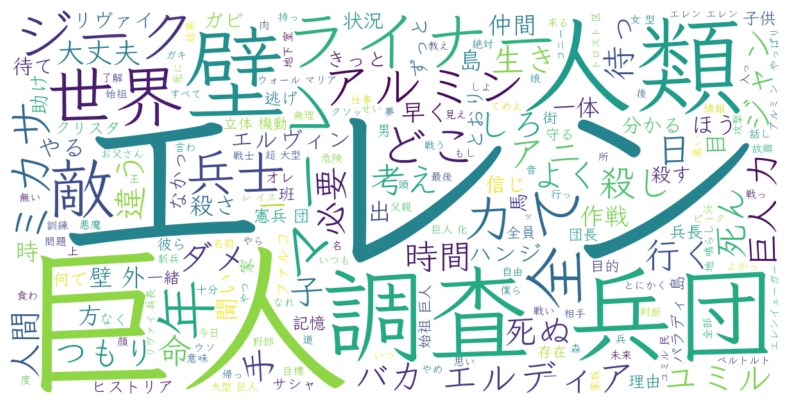

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 用空格连结所有词
cloudwords = ' '.join(filtered_word_list)

# 生成词云图
wordcloud = WordCloud(font_path='E:\\Github\\animecomment\\others\\LXGWWenKai-Light.ttf', width=1200, height=600, background_color='white').generate(cloudwords)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()